In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [6]:
X,Y=make_classification(n_classes=2,n_samples=400,n_features=2,n_informative=2,n_clusters_per_class=1,n_redundant=0,random_state=3)

In [20]:
#convert Y label to -1 and 1 from 0 and 1

Y[Y==0]=-1 #broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

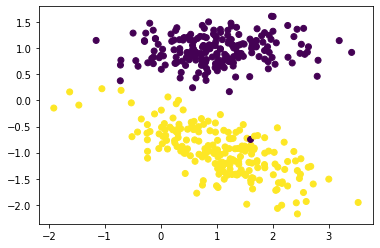

In [21]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [54]:
class SVM:
  
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses    
  
                        
            
            
        
        
        
            
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [55]:
svm=SVM()
w,b,losses=svm.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

400.0
14.950791626407211


In [23]:
ids=np.arange(100)
np.random.shuffle(ids)
print(ids)

[96  7 27 95 52 15 17 30 33  4 31 23 54 37 66 93 78 76 12 77 53 24 86 79
  8 83 59  0 18 73 99 13 89 48 40 22 68 43 61  9 92  1 19 28 25 64  5 36
 11 81 56  2 41 58 90 20 42 34 65 60 67 80 50 51 26 62 82  3 72 57 39 91
 69 63 16 85 88 29 47 14 94 74 46 21 32 71 87 35 10 55 84 38 75 44 49 45
  6 70 97 98]


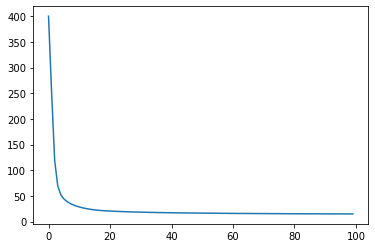

In [56]:
plt.plot(losses)

In [61]:
w,b=svm.W,svm.b
print(w,b)

[[-0.32238799 -2.03563553]] 0.3870000000000003


In [71]:
def plotHyperplane(w1,w2,b):
    
    plt.figure(figsize=(15,15))
    x1=np.linspace(-2,4,10)
    x2= -(w1*x1+b)/w2   # wT+B =0
    
    x_p = -(w1*x1+b+1)/w2   # wT +B = -1 hyperplane positive boundary
    x_n= -(w1*x1+b-1)/w2    #wT +B = 1   hyperplane negative boundary
    
    plt.plot(x1,x2,label="Hyperplane WX+B=0")
    plt.plot(x1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.plot()
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    
    

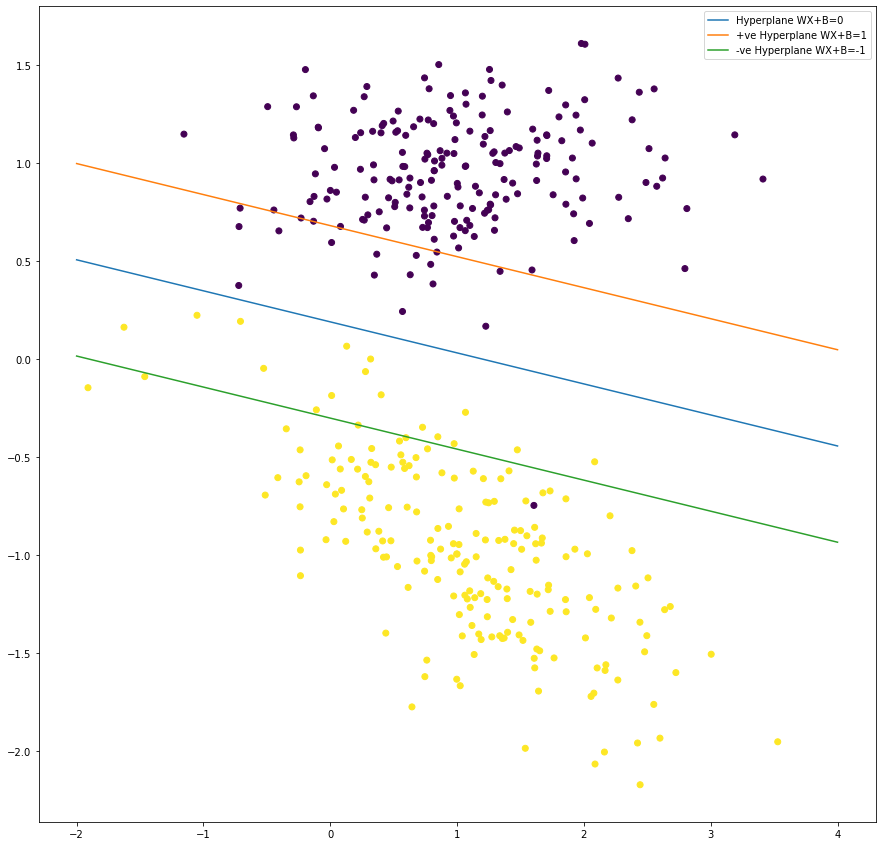

In [72]:
plotHyperplane(w[0,0],w[0,1],b)

In [73]:
# high penalty
svm=SVM(C=1000)
w,b,losses=svm.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

400000.0
20648.931762877615


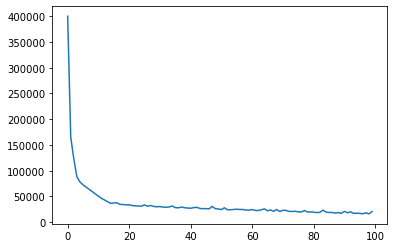

In [74]:
plt.plot(losses)

In [75]:
w,b=svm.W,svm.b

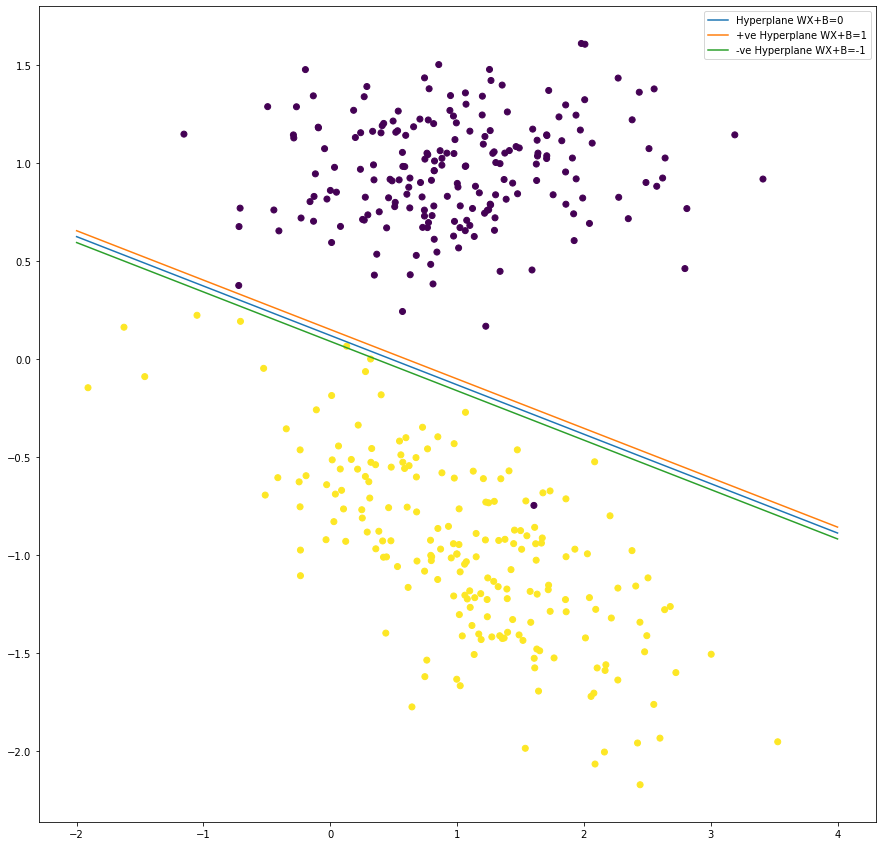

In [76]:
plotHyperplane(w[0,0],w[0,1],b)